In [1]:
import pandas as pd
import numpy as np
from tabprintin.beautify import *
import matplotlib.pyplot as plt
from varname import nameof
import os
import subprocess

In [2]:
resource = "../../data/generated/"
results = "../../latex/"

In [3]:
# Check if the directory exists or not
if not os.path.exists(results + "tables"):
    # If it doesn't exist, create it
    os.makedirs(results + "tables")

tables = "tables/"

# Check if the directory exists or not
if not os.path.exists(results + "plots"):
    # If it doesn't exist, create it
    os.makedirs(results + "plots")

plots = "plots/"

In [4]:
# %run do_analysis.ipynb

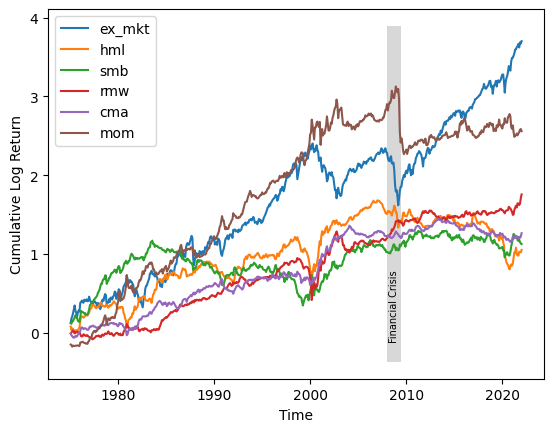

In [5]:
%store -r ts

sdate = pd.to_datetime('1975-01-01')
edate = pd.to_datetime('2021-12-31')

ts = ts.loc[(ts.index >= sdate) & (ts.index <= edate)]

variables = ['ex_mkt', 'hml', 'smb', 'rmw', 'cma', 'mom']

# Calculate cumulative log returns
cumulative_returns = np.log(1 + ts[variables]).cumsum()

# Plot cumulative log returns
for var in variables:
    plt.plot(cumulative_returns.index, cumulative_returns[var], label=var)

# Define the date range for the grey area
start_date = pd.to_datetime('2007-12-01')
end_date = pd.to_datetime('2009-06-30')

# Plot the grey area
plt.fill_between(cumulative_returns.index, plt.ylim()[0], plt.ylim()[1], where=(cumulative_returns.index >= start_date) & (cumulative_returns.index <= end_date), facecolor='gray', alpha=0.3)

# Add label for the grey area (rotated vertically and at the bottom)
crisis_label = 'Financial Crisis'
crisis_label_x = start_date + (end_date - start_date) / 2
crisis_label_y = plt.ylim()[0] + (plt.ylim()[1] - plt.ylim()[0]) * 0.1
plt.text(crisis_label_x, crisis_label_y, crisis_label, ha='center', va='bottom', color='black', fontsize=7, rotation='vertical')

# plt.title('Cumulative Log Returns')
plt.xlabel('Time')
plt.ylabel('Cumulative Log Return')
plt.legend()

# Save the figure to the specified location
plt.savefig(results + plots + 'cumret_ff.png', bbox_inches='tight')

plt.show()

In [6]:
# Exogenous variables to be showned
# exogvars = (['ex_mkt',
#              'ex_long_gov_ret',
#              'ex_medium_gov_ret',
#              'ex_high_yd_bd_ret',
#              'ex_gold_ret', 
#              'slope_ex_mkt_87', 
#              'slope_ex_mkt_9602', 
#              'Intercept',
#              'rf', 
#              'lag_10y_3m_gov_bd_yd',
#              'lag_1y_3m_gov_bd_yd',
#              'lag_Baa_Aaa_bd_yd',
#              'lag_sp_div_yd',
#              'log_indprod_growth_lastyear',
#              'infl_lastyear',
#              'ex_mkt_lastyear'])
exogvars = (['ex_mkt',
             'ex_b10ret',
             'ex_b5ret',
        #      'ex_high_yd_bd_ret',
             'ex_gold_ret', 
             'slope_ex_mkt_87', 
             'slope_ex_mkt_9602', 
             'slope_ex_mkt_0709', 
             'Intercept',
             'rf', 
             'lag_10y_3m_gov_bd_yd',
             'lag_1y_3m_gov_bd_yd',
             'lag_Baa_Aaa_bd_yd',
             'lag_sp_div_yd',
             'log_indprod_growth_lastyear',
             'infl_lastyear',
             'ex_mkt_lastyear'])

# varlabels={  'log_indprod_growth_nextyear': r'Ind. productivity growth',
#              'ex_mkt': r'Market portfolio ex. return ($RM_{t-1,t}$)',
#              'ex_b10ret': r'Long-term gov. bond ex. return$_{t-1,t}$',
#              'ex_b5ret': r'Medium-term gov. bond ex. return$_{t-1,t}$',
#              'ex_high_yd_bd_ret': r'High-yield bond portfolio ex. return$_{t-1,t}$', 
#              'ex_gold_ret': r'Gold ex. returns$_{t-1,t}$', 
#              'slope_ex_mkt_87': 'Slope dummy mkt portfolio ex. return (87)', 
#              'slope_ex_mkt_9602': 'Slope dummy mkt portfolio ex. return (96-02)',
#              'rf': 'Risk-free rate of return', 
#              'lag_10y_3m_gov_bd_yd': r'10-year minus 3-month gov. bond yield$_{t-1}$',
#              'lag_1y_3m_gov_bd_yd': r'1-year minus 3-month gov. bond yield$_{t-1}$',
#              'lag_Baa_Aaa_bd_yd': r'Baa minus Aaa corporate bond yield$_{t-1}$',
#              'lag_sp_div_yd': r'Dividend yield$_{t-1}$',
#              'log_indprod_growth_lastyear': r'Industrial production growth$_{t-13,t-1}$',
#              'infl_lastyear': r'Inflation$_{t-13,t-1}$',
#              'ex_mkt_lastyear': r'Market portfolio ex. return ($RM_{t-13,t-1}$)'}
varlabels={  'log_indprod_growth_nextyear': r'Ind. productivity growth',
             'ex_mkt': r'Market portfolio ex. return ($RM_{t-1,t}$)',
             'ex_b10ret': r'10-year gov. bond ex. return$_{t-1,t}$',
             'ex_b5ret': r'5-year gov. bond ex. return$_{t-1,t}$',
        #      'ex_high_yd_bd_ret': r'High-yield bond portfolio ex. return$_{t-1,t}$', 
             'ex_gold_ret': r'Gold ex. returns$_{t-1,t}$', 
             'slope_ex_mkt_87': 'Slope dummy mkt ex. return (87)', 
             'slope_ex_mkt_9602': 'Slope dummy mkt ex. return (96-02)',
             'slope_ex_mkt_0709': 'Slope dummy mkt ex. return (07-09)',
             'rf': 'Risk-free rate of return', 
             'lag_10y_3m_gov_bd_yd': r'10-year minus 3-month gov. bond yield$_{t-1}$',
             'lag_1y_3m_gov_bd_yd': r'1-year minus 3-month gov. bond yield$_{t-1}$',
             'lag_Baa_Aaa_bd_yd': r'Baa minus Aaa corporate bond yield$_{t-1}$',
             'lag_sp_div_yd': r'Dividend yield$_{t-1}$',
             'log_indprod_growth_lastyear': r'Industrial production growth$_{t-13,t-1}$',
             'infl_lastyear': r'Inflation$_{t-13,t-1}$',
             'ex_mkt_lastyear': r'Market portfolio ex. return ($RM_{t-13,t-1}$)'}

# row_name = (['Intercept',
#              r'Market portfolio excess return ($RM_{t-1,t}$)',
#              r'Long-term government bond excess return$_{t-1,t}$',
#              r'Medium-term government bond excess return$_{t-1,t}$',
#              r'High-yield bond portfolio excess return$_{t-1,t}$', 
#              r'Gold ex. returns$_{t-1,t}$', 
#              'Slope dummy mkt portfolio ex. return (1987)', 
#              'Slope dummy mkt portfolio ex. return (1996-2002)',
#              'Risk-free rate of return', 
#              r'10-year minus 3-month government bond yield$_{t-1}$',
#              r'1-year minus 3-month government bond yield$_{t-1}$',
#              r'Baa minus Aaa corporate bond yield$_{t-1}$',
#              r'Dividend yield$_{t-1}$',
#              r'Industrial production growth$_{t-13,t-1}$',
#              r'Inflation$_{t-13,t-1}$',
#              r'Market portfolio excess return ($RM_{t-13,t-1}$)'])
row_name = (['Intercept',
             r'Market portfolio excess return ($RM_{t-1,t}$)',
             r'10-year government bond excess return$_{t-1,t}$',
             r'5-year government bond excess return$_{t-1,t}$',
        #      r'High-yield bond portfolio excess return$_{t-1,t}$', 
             r'Gold ex. returns$_{t-1,t}$', 
             'Slope dummy mkt portfolio ex. return (1987)', 
             'Slope dummy mkt portfolio ex. return (1996-2002)',
             'Slope dummy mkt portfolio ex. return (2007-2009)',
             'Risk-free rate of return', 
             r'10-year minus 3-month government bond yield$_{t-1}$',
             r'1-year minus 3-month government bond yield$_{t-1}$',
             r'Baa minus Aaa corporate bond yield$_{t-1}$',
             r'Dividend yield$_{t-1}$',
             r'Industrial production growth$_{t-13,t-1}$',
             r'Inflation$_{t-13,t-1}$',
             r'Market portfolio excess return ($RM_{t-13,t-1}$)'])

col_name = (['HML',
             'SMB',
             'WML',
             'MYP', 
             'UI', 
             'DSV', 
             'ATS',
             'STS', 
             'FX'])

# %store -r mimick1
# %store -r mimick2
%store -r mimick_list

mimick = pystout(models=mimick_list,
        # file='test_table.tex',
        # addnotes=['Here is a little note','And another one'],
        exogvars=exogvars,
        endog_names=['jan1975-dec2021','jan1975-nov2007','dec2007-dec2021'],
        varlabels=varlabels,
        digits=3,
        addrows={'1-month lagged base asset returns':['Yes','Yes','Yes']},
        modstat={'nobs':'Obs','rsquared_adj':'Adj. R\sym{2}','fvalue':'F-stat'}
        )
        
# Open a .tex file for writing  
with open(results + tables + nameof(mimick) + '.tex', 'w') as f:
# with open(results + nameof(mimick) + '.tex', 'w') as f:
    # Write the LaTeX string to the file
    f.write(mimick)

In [7]:
var_name = (['MYP', 
             'UI', 
             'DSV', 
             'ATS',
             'STS', 
             'FX'])

stat_name = (['N', 
             r'Mean ($\times 10^3$)', 
             r'Median ($\times 10^3$)',
             r'Std. dev. ($\times 10^3$)', 
             r'Skew',
             r'Kurt', 
             r'Min. ($\times 10^3$)', 
            #  r'25\% ($\times 10^3$)', 
            #  r'75\% ($\times 10^3$)',
             r'Max. ($\times 10^3$)'])

%store -r summary_list

for i, summary in enumerate(summary_list):
    summary.index = var_name
    summary.columns = stat_name

    summary.N = summary.N.astype(int)

    # Create a copy of the original DataFrame
    summary_copy = summary.copy()
    # summary_copy.iloc[:,1:] = summary_copy.iloc[:,1:] * 1000
    selected_columns = [1, 2, 3, 6, 7]
    summary_copy.iloc[:, selected_columns] = summary_copy.iloc[:, selected_columns] * 1000

    summary_stats = summary_copy.style.format(decimal='.', thousands=',', precision=3).to_latex()

    summary_stats = summary_stats.replace('\\begin{tabular}{lrrrrrrrr}','')
    summary_stats = summary_stats.replace('MYP','\\hline \n MYP')
    summary_stats = summary_stats.replace('\\end{tabular}','')

    # Open a .tex file for writing  
    with open(results + tables + nameof(summary_stats) + f'{i}.tex', 'w') as f:
        # Write the LaTeX string to the file
        f.write(summary_stats)

In [8]:
var_name = (['RM',
             'HML',
             'SMB',
             'RMW',
             'CMA',
             'MOM',
             'MYP', 
             'UI', 
             'DSV', 
             'ATS',
             'STS', 
             'FX'])

%store -r corr_list

for i, corr in enumerate(corr_list):
    corr.index = var_name
    corr.columns = var_name

    corr_stats = corr.style.format(decimal='.', thousands=',', precision=2).to_latex()

    # corr_stats = corr_stats.replace('\\begin{tabular}{lrrrrrrrr}','\\begin{tabular}{lrrrrrrrr} \n \\hline \n \\hline')
    corr_stats = corr_stats.replace('\\begin{tabular}{lrrrrrrrrrrrr}','')
    # corr_stats = corr_stats.replace('MYP','\\hline \n MYP')
    corr_stats = corr_stats.replace('\\end{tabular}','')

    # Open a .tex file for writing  
    with open(results + tables + nameof(corr_stats) + f'{i}.tex', 'w') as f:
        # Write the LaTeX string to the file
        f.write(corr_stats)

In [9]:
# %store -r var

# coef_data = var.params
# tstat_data = var.tvalues

# row_name = (['Constant',
#              'HML',
#              'SMB',
#              'WML',
#              'MYP', 
#              'UI', 
#              'DSV', 
#              'ATS',
#              'STS', 
#              'FX'])

# col_name = (['HML',
#              'SMB',
#              'WML',
#              'MYP', 
#              'UI', 
#              'DSV', 
#              'ATS',
#              'STS', 
#              'FX'])

# var_est = table_to_latex(coef_data, tstat_data,  row_name, col_name)

# # Open a .tex file for writing  
# with open(results + tables + nameof(var_est) + '.tex', 'w') as f:
#     # Write the LaTeX string to the file
#     f.write(var_est)

In [10]:
%store -r coeff_var_list
%store -r tvalues_var_list
%store -r pvalues_var_list

row_name = (['Constant',
             'HML',
             'SMB',
             'RMW',
             'CMA',
             'WML',
             'MYP', 
             'UI', 
             'DSV', 
             'ATS',
             'STS', 
             'FX'])

col_name = (['HML',
             'SMB',
             'RMW',
             'CMA',
             'WML',
             'MYP', 
             'UI', 
             'DSV', 
             'ATS',
             'STS', 
             'FX'])

for i, var_coeff in enumerate(coeff_var_list):
    # Initialize
    coeff_var = pd.DataFrame(var_coeff)
    tvalues_var = pd.DataFrame(tvalues_var_list[i])
    pvalues_var = pd.DataFrame(pvalues_var_list[i])

    # get latex
    var_est = table_to_latex(coeff_var, tvalues_var, pvalues_var, row_name, col_name)

    # Open a .tex file for writing  
    with open(results + tables + f'var{i}.tex', 'w') as f:
        # Write the LaTeX string to the file
        f.write(var_est)

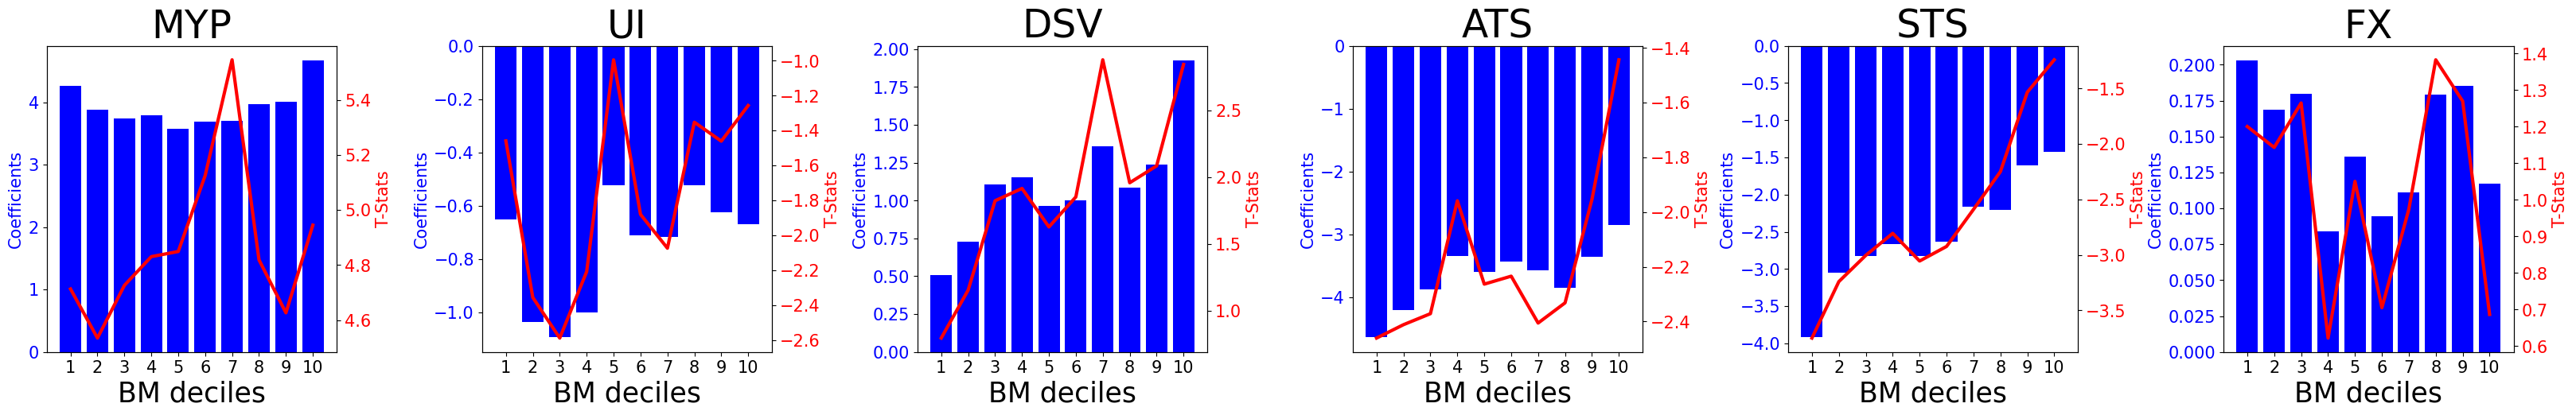

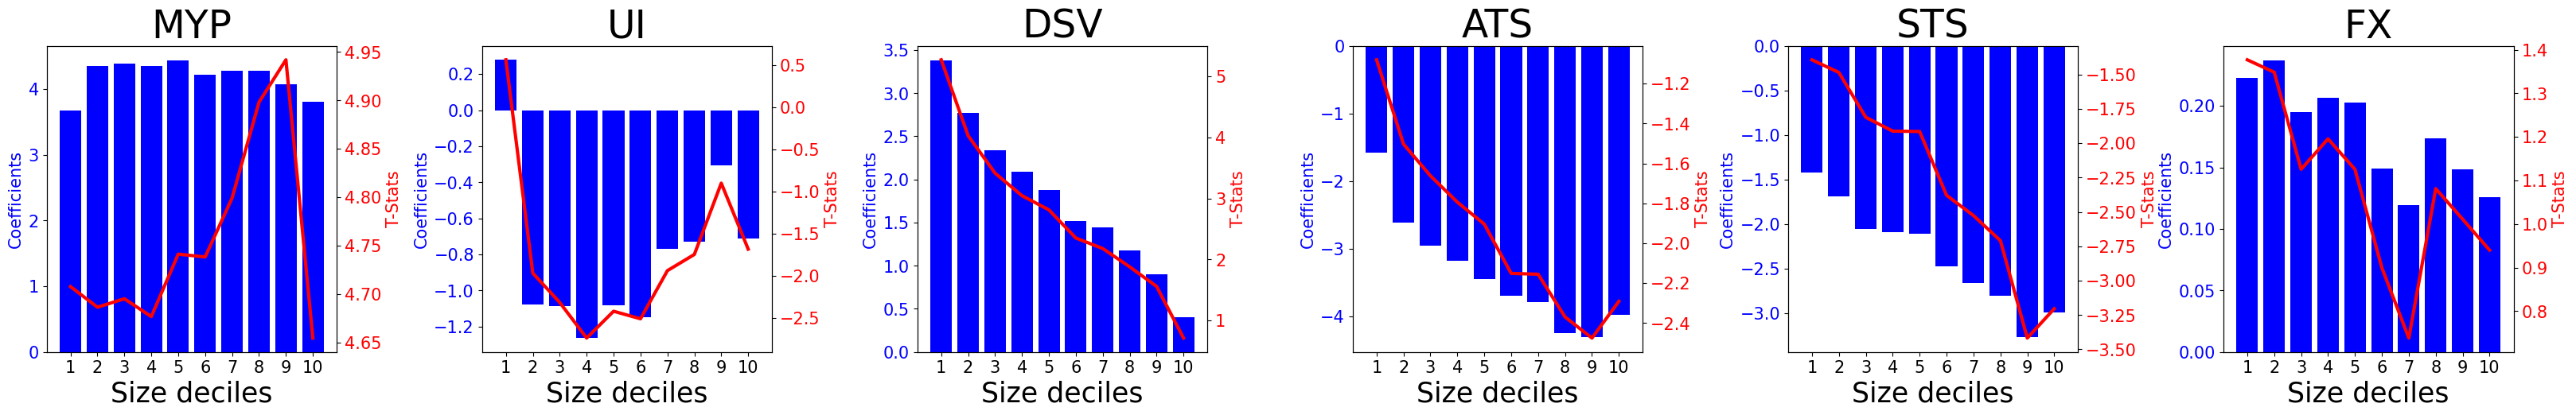

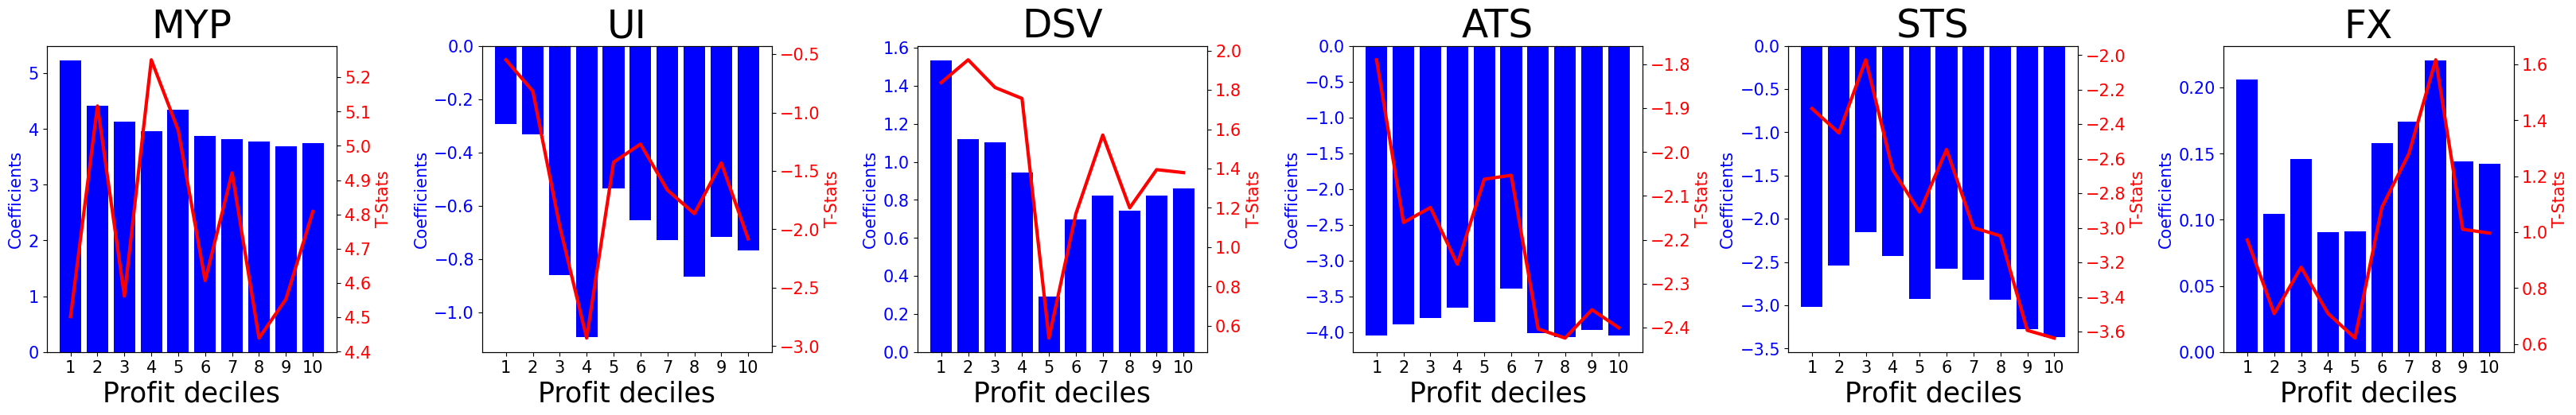

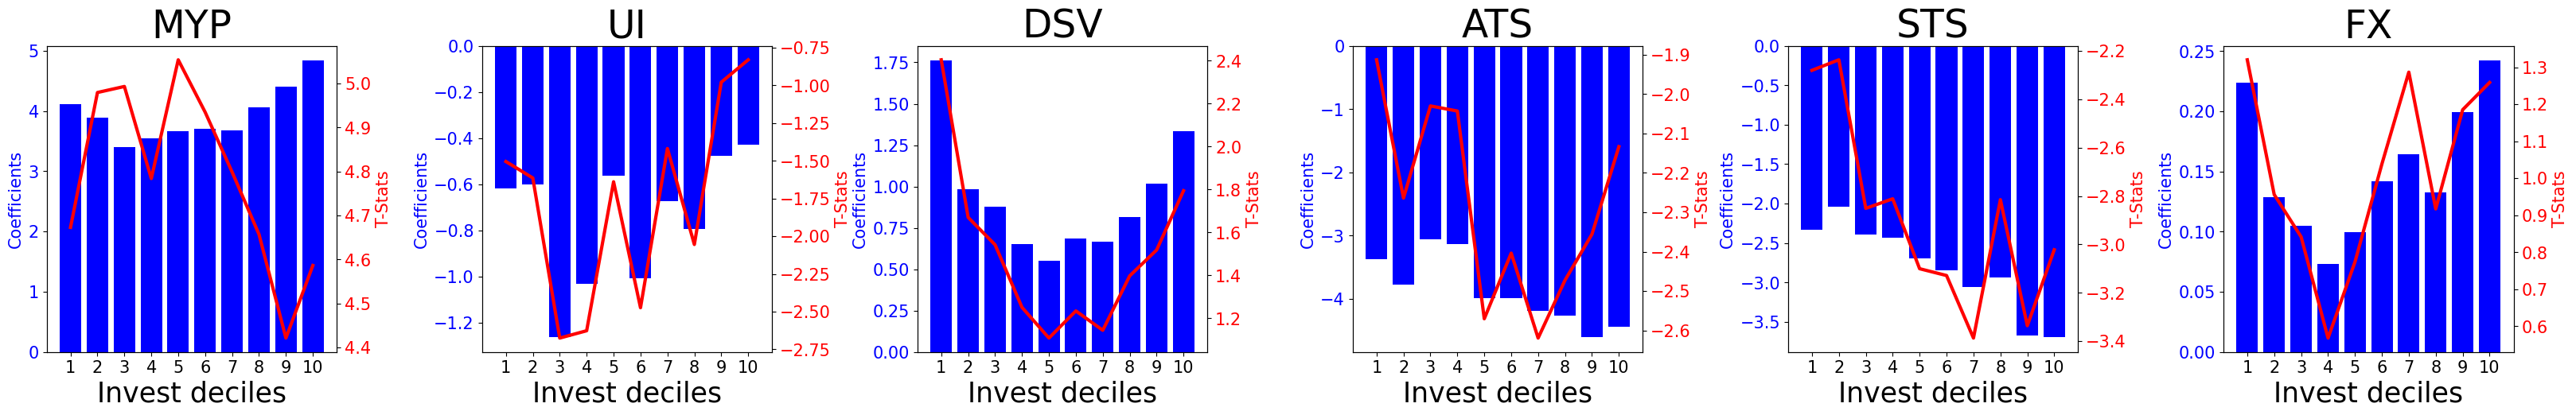

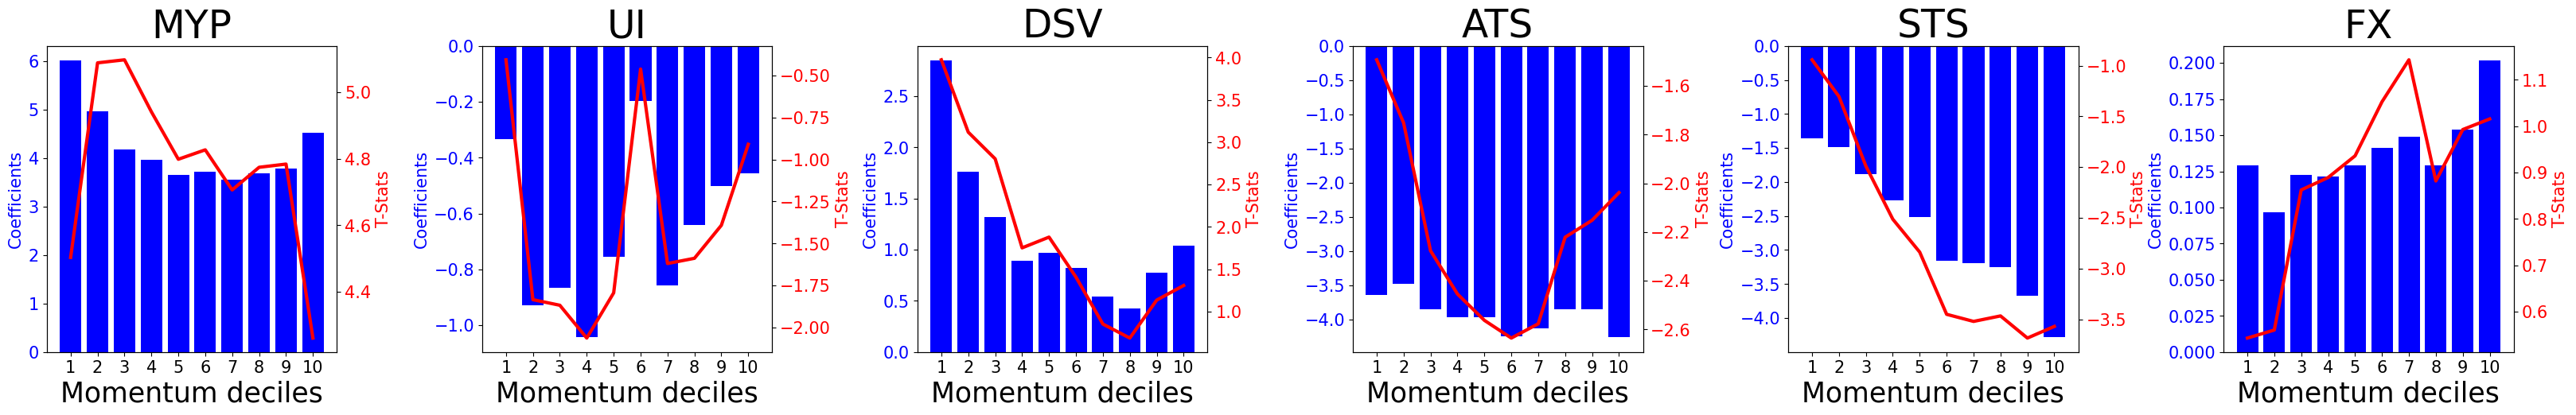

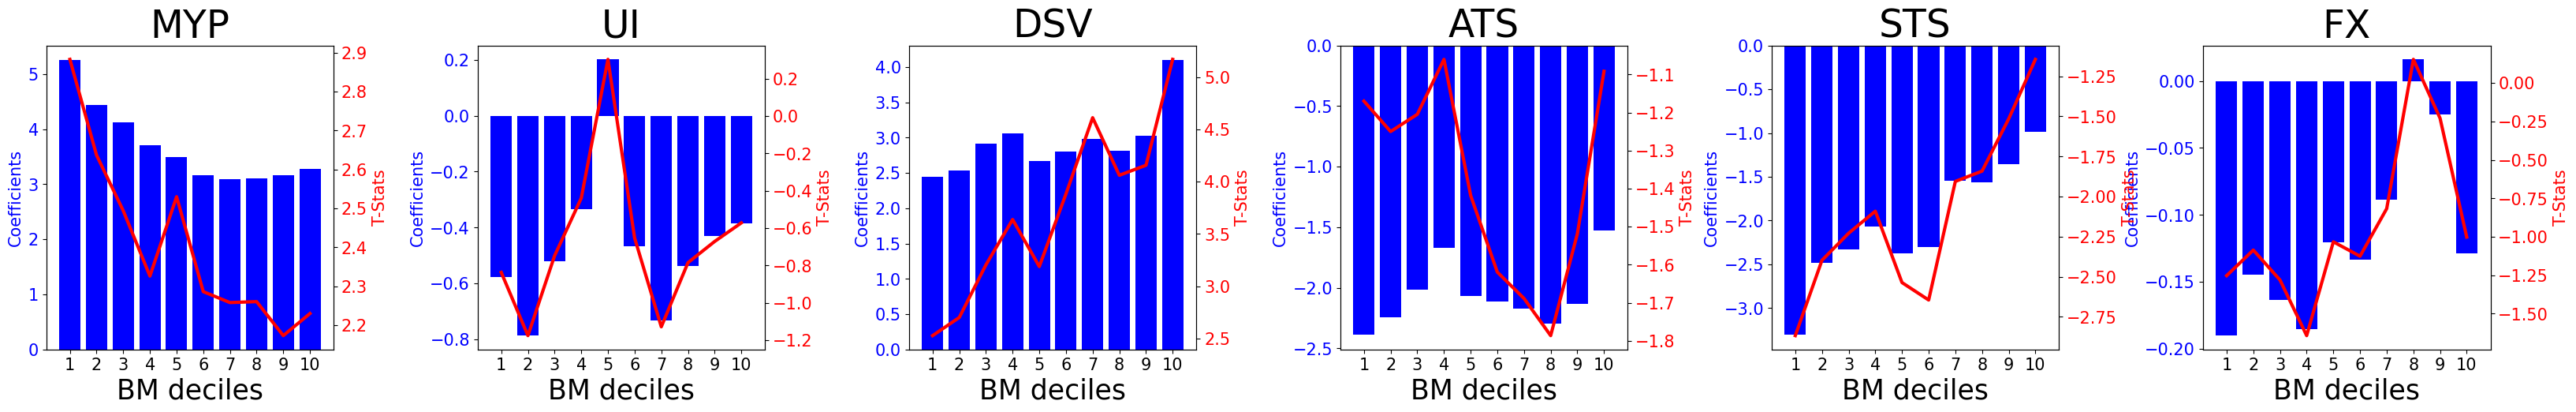

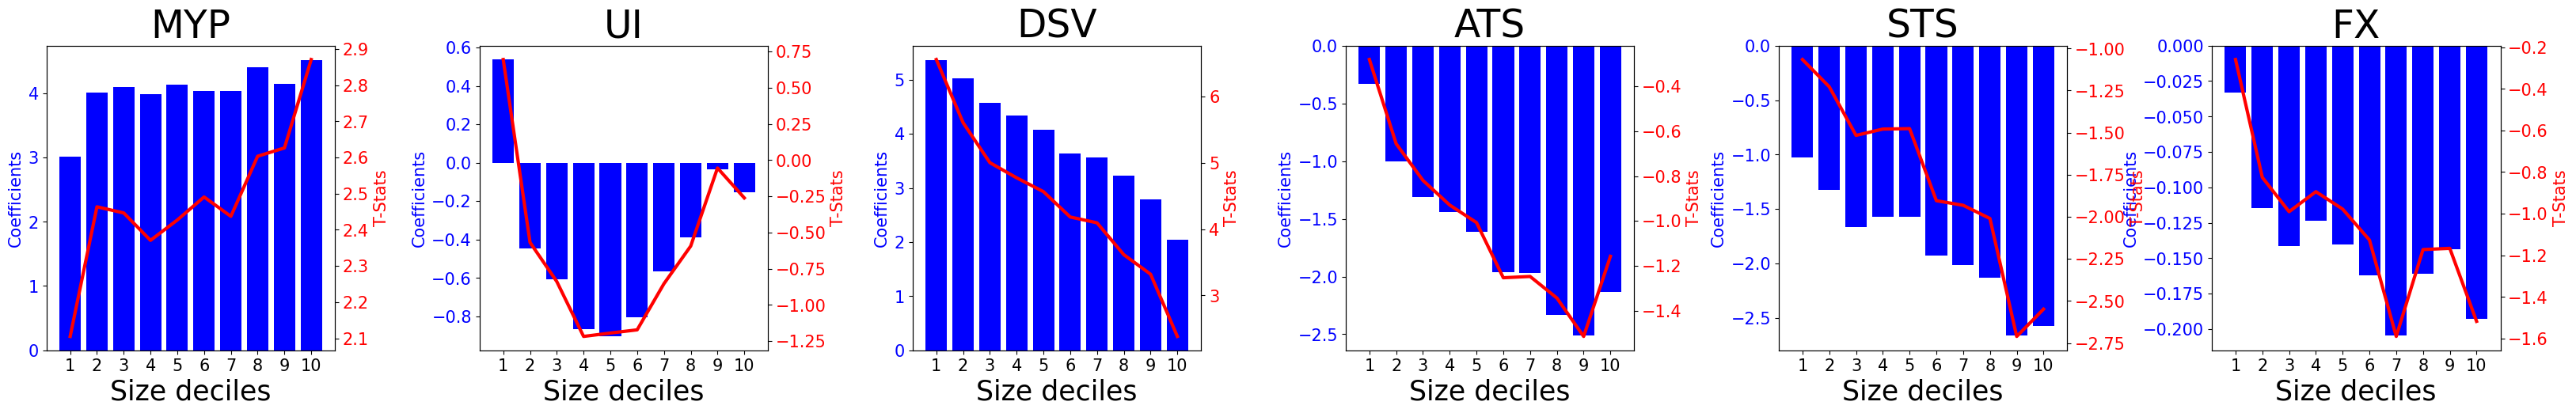

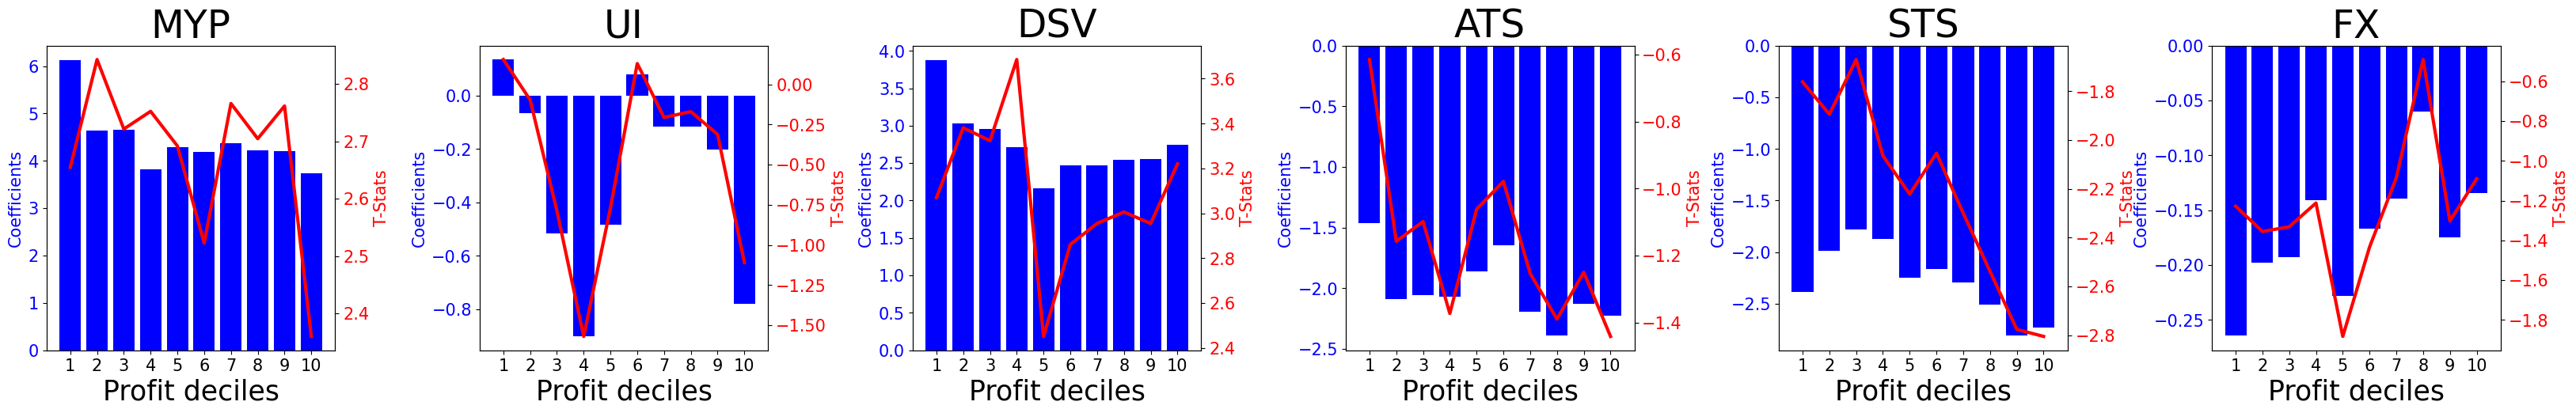

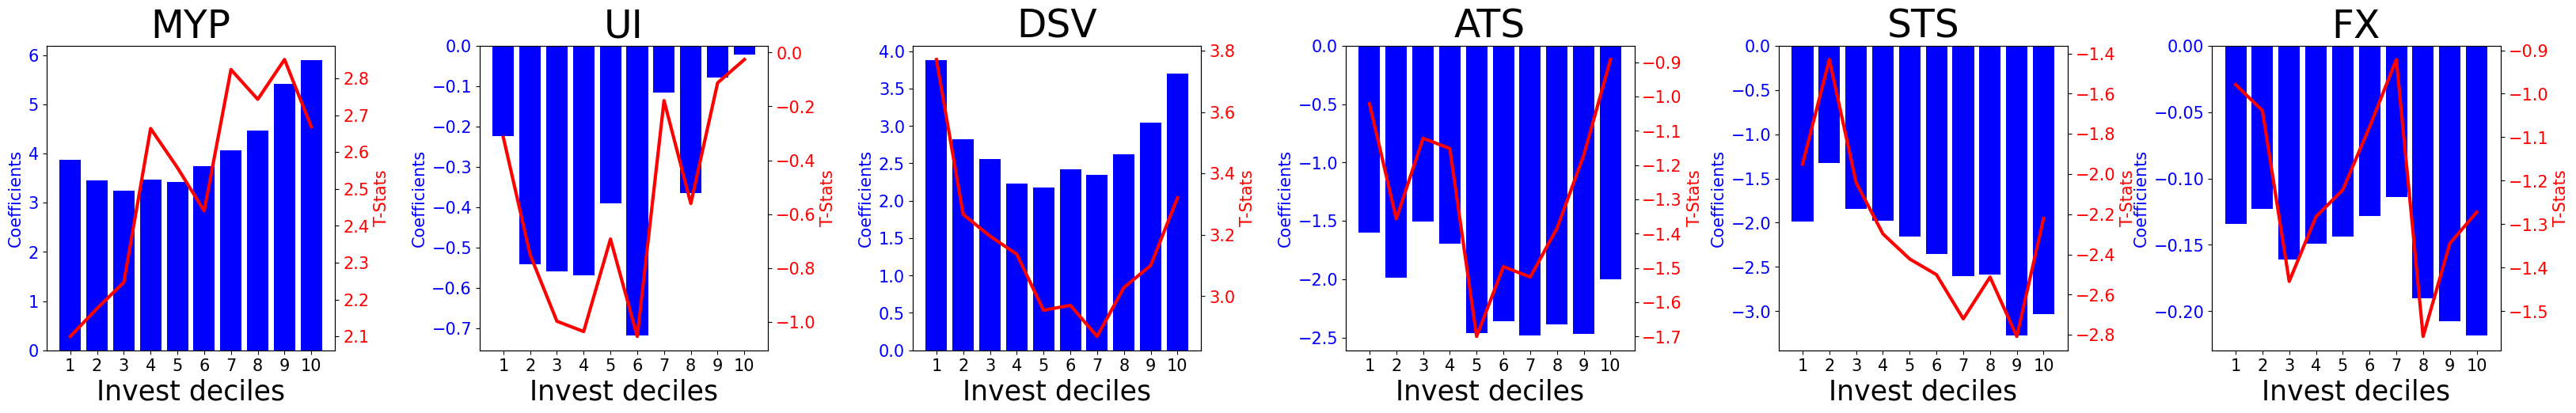

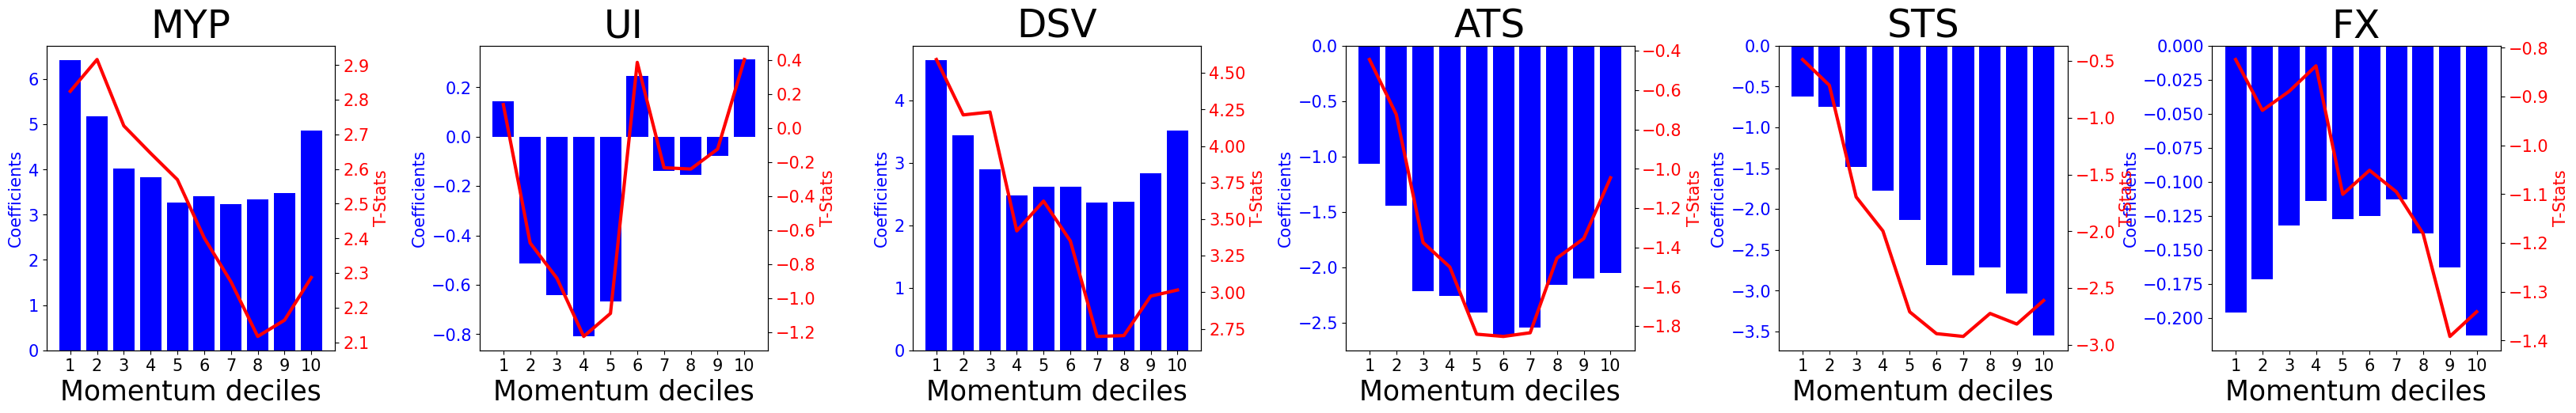

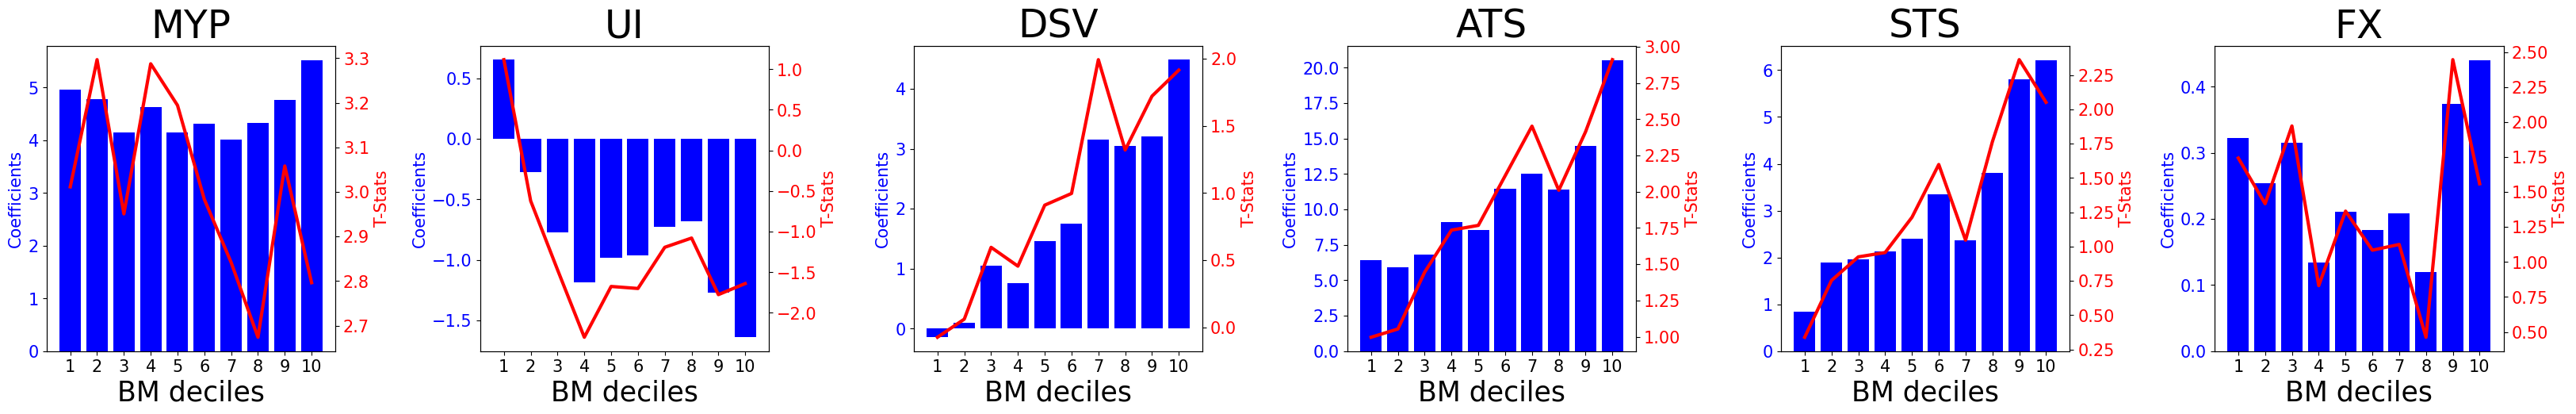

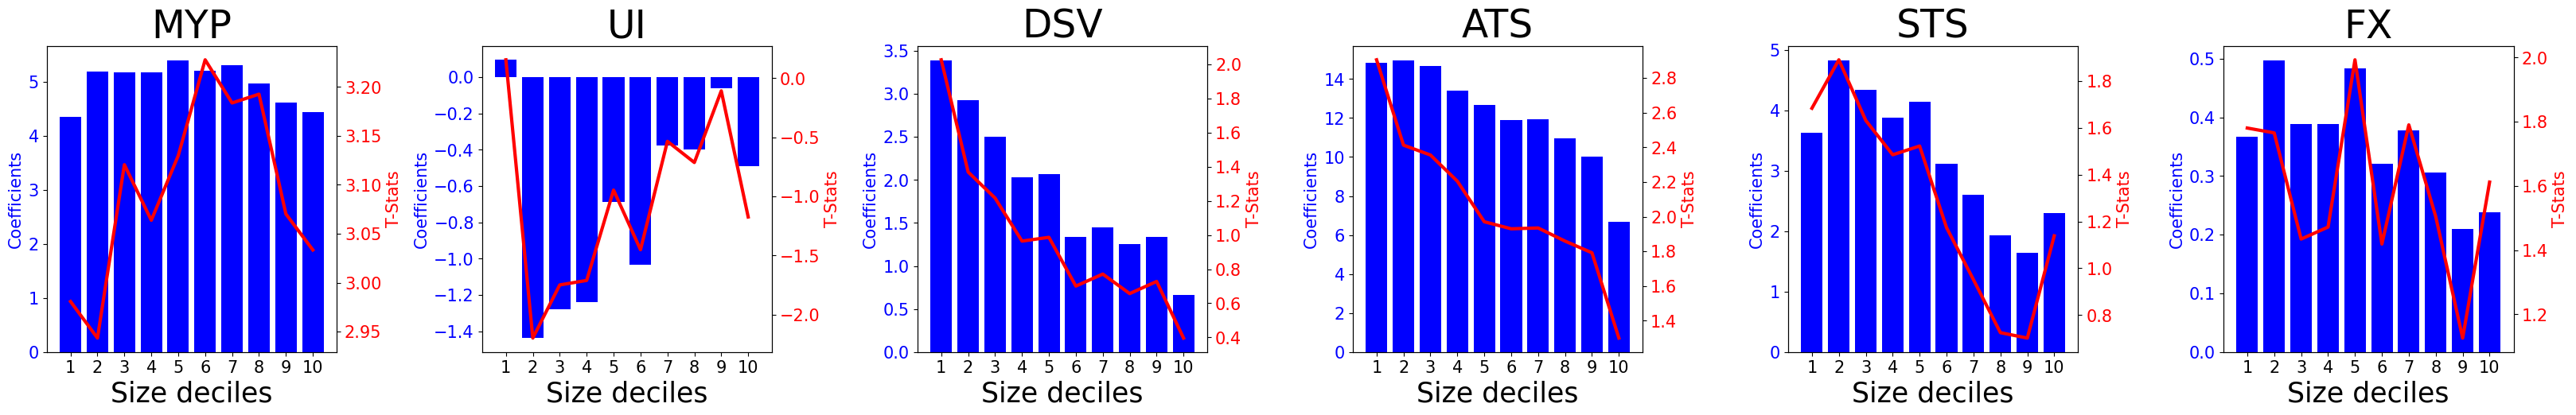

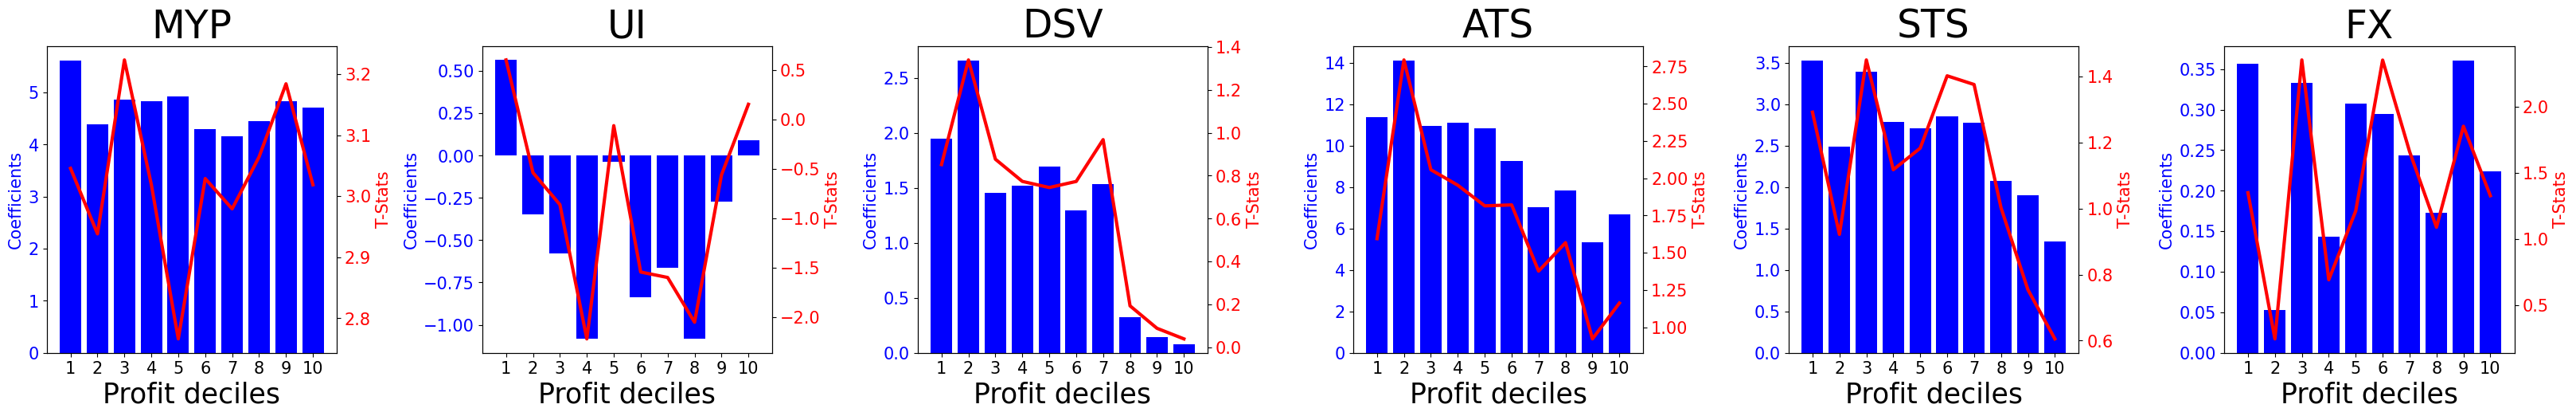

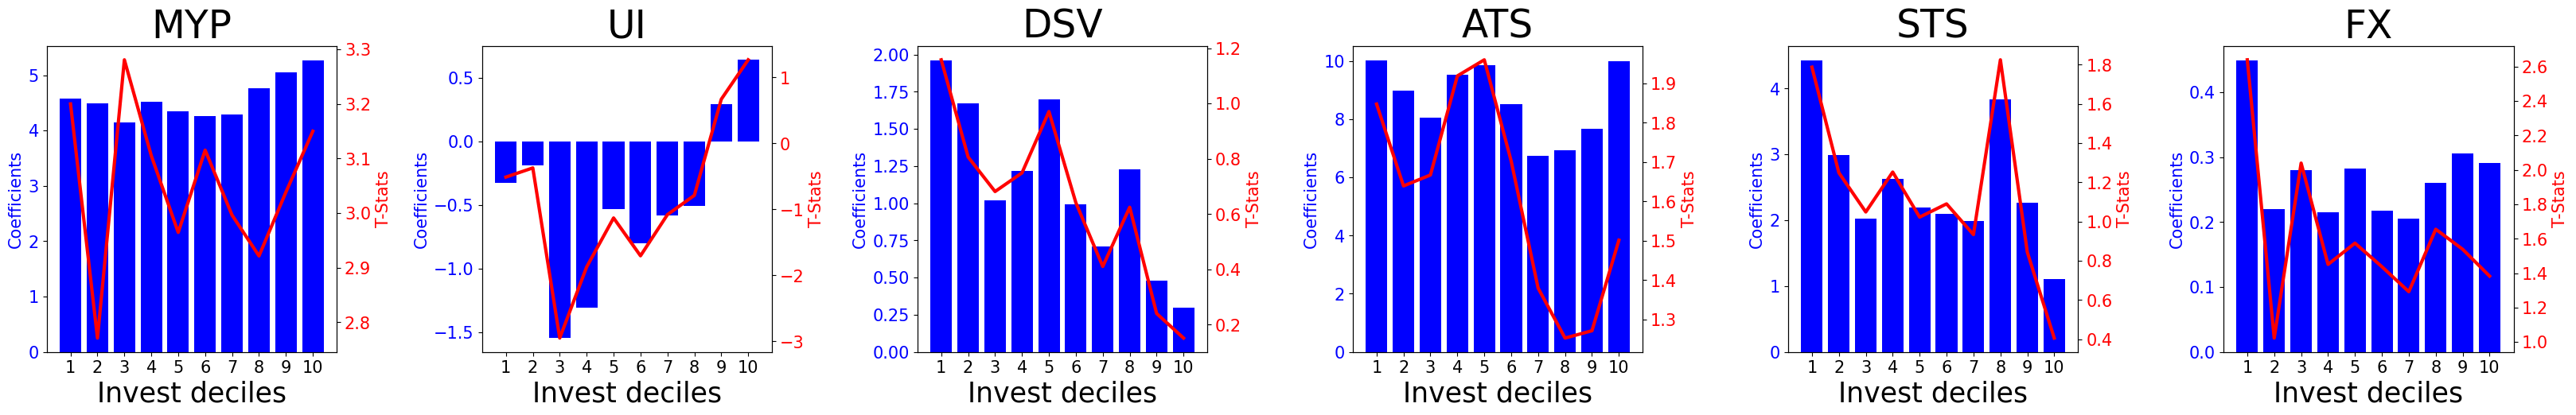

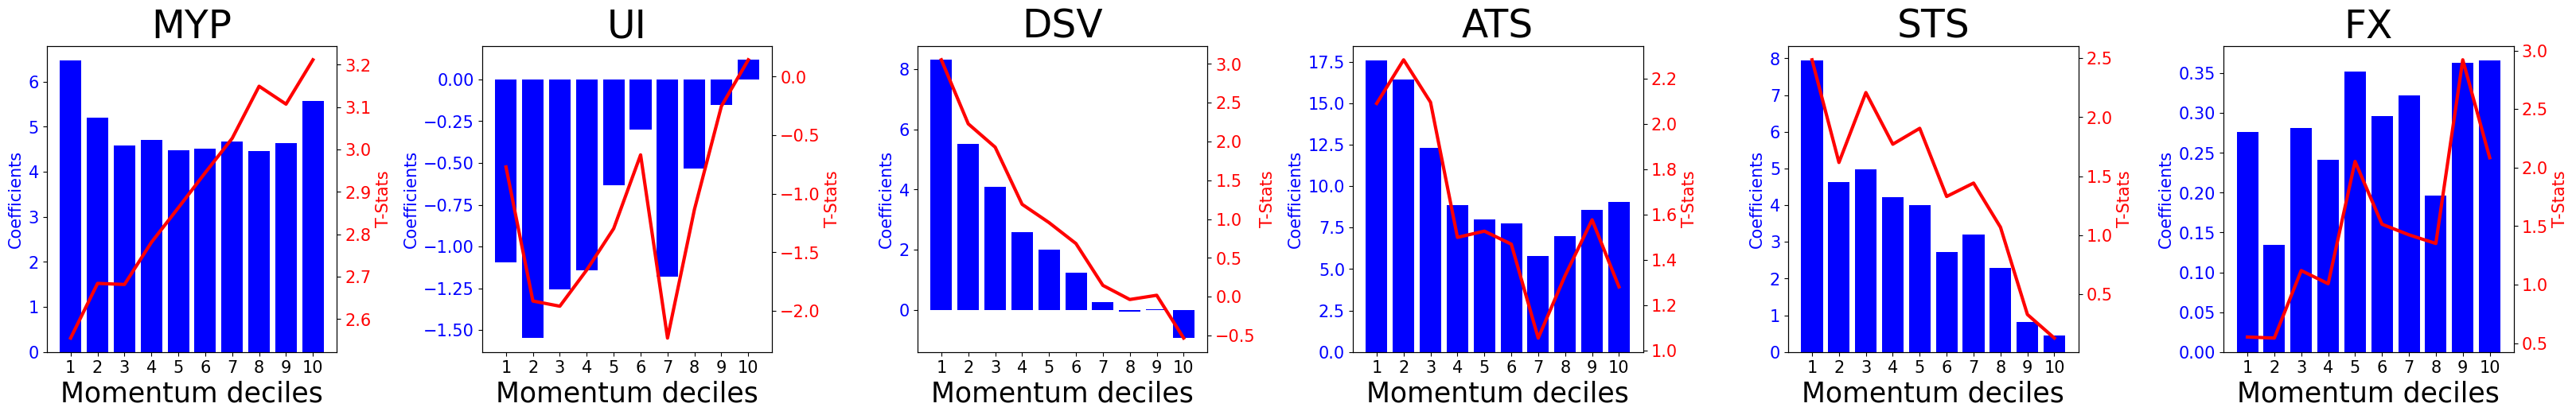

In [11]:
%store -r beta_params_list
%store -r beta_bse_list
%store -r beta_tvalues_list
%store -r beta_pvalues_list

macro_factors = ['MYP', 'UI', 'DSV', 'ATS', 'STS', 'FX']
M = len(macro_factors)
nport = 10  # if deciles then set 10

portfolios = ['BM deciles', 'Size deciles', 'Profit deciles', 'Invest deciles', 'Momentum deciles']


for k in range(len(beta_params_list)):
    beta_params = beta_params_list[k]
    beta_tvalues = beta_tvalues_list[k]
    for index, j in enumerate(range(len(portfolios))):
        # Create a figure with subplots for each column
        fig, axs = plt.subplots(1, 6, figsize=(40, 5))
        # coefficients = lambeta_params[j][-66:-6].reshape((10,6))
        coefficients = beta_params[j][-(M+1)*nport:]
        coefficients = np.delete(coefficients, np.arange(0, (M+1)*nport, M+1)).reshape(nport,M)
        t_stats = beta_tvalues[j][-(M+1)*nport:]
        t_stats = np.delete(t_stats, np.arange(0, (M+1)*nport, M+1)).reshape(nport,M)

        # Loop through each column and plot the histogram and line plot
        for index2, i in enumerate(range(coefficients.shape[1])):
            # Plot histogram of coefficients on left y-axis
            axs[i].bar(np.arange(1, coefficients.shape[0]+1), coefficients[:, i], color='blue')
            axs[i].set_ylabel('Coefficients', color='blue', fontsize=15)
            axs[i].tick_params(axis='y', labelcolor='blue', labelsize=15)
            
            # Add line plot of t-stats on right y-axis
            axs2 = axs[i].twinx()
            axs2.plot(np.arange(1, t_stats.shape[0]+1), t_stats[:, i], color='red', linewidth=3)
            axs2.set_ylabel('T-Stats', color='red', fontsize=15)
            axs2.tick_params(axis='y', labelcolor='red', labelsize=15)
            
            # Set x-axis label and tick marks
            axs[i].set_xlabel(portfolios[index], fontsize=25)
            axs[i].set_xticks(np.arange(1, coefficients.shape[0]+1))
            axs[i].tick_params(axis='x', labelsize=15)
            axs[i].set_title(macro_factors[index2], fontsize=35)

        # Increase space between subplots
        fig.subplots_adjust(wspace=0.5)

        # Save the figure to the specified location
        fig.savefig(results + plots + f'betahist{index+1}_sample{k}.png', bbox_inches='tight')

In [12]:
%store -r beta_params_list2
%store -r beta_bse_list2
%store -r beta_tvalues_list2
%store -r beta_pvalues_list2

row_name = (['RM',
             'HML',
             'SMB',
             'RMW',
             'CMA',
             'WML'])

col_name = (['Constant',
             'MYP', 
             'UI', 
             'DSV', 
             'ATS',
             'STS', 
             'FX'])

nrow = len(row_name)
ncol = len(col_name)

for i, coeff in enumerate(beta_params_list2):
    # Initialize
    coeff = pd.DataFrame(coeff[-nrow*ncol:].reshape(nrow,ncol))
    tvalues = pd.DataFrame(beta_tvalues_list2[i][-nrow*ncol:].reshape(nrow,ncol))
    pvalues = pd.DataFrame(beta_pvalues_list2[i][-nrow*ncol:].reshape(nrow,ncol))

    # get latex
    macroexp_est = table_to_latex(coeff, tvalues, pvalues, row_name, col_name)

    # Open a .tex file for writing  
    with open(results + tables + f'macroexp_sample{i}.tex', 'w') as f:
        # Write the LaTeX string to the file
        f.write(macroexp_est)